In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./newds/dataset.csv')
df

,SEQN,GENDER,AGE,HISPANIC_O,SLEEP_HRS,DIASTOLIC,SYSTOLIC,WEIGHT,HEIGHT,BMI,...,DPQ090,SCORE,DEPRESSION,SFHL,HFHL,NDPNDB,NDPDB,DPNDB,DPDB,DPDB_VAL
0,109282.0,1.0,76.0,3.0,7.50,72.666667,139.333333,83.3,177.1,26.6,...,0,5,1.0,10.000,26.666667,0.0,0.0,1.0,0.0,2.0
1,109303.0,1.0,18.0,6.0,8.25,64.666667,101.000000,45.5,159.3,17.9,...,0,1,0.0,-2.500,3.333333,1.0,0.0,0.0,0.0,0.0
2,109321.0,2.0,19.0,4.0,7.00,61.666667,93.333333,83.5,158.7,33.2,...,0,3,0.0,8.750,11.666667,1.0,0.0,0.0,0.0,0.0
3,109330.0,1.0,76.0,6.0,8.00,71.333333,124.333333,61.5,162.5,23.3,...,0,0,0.0,20.000,41.666667,1.0,0.0,0.0,0.0,0.0
4,109382.0,2.0,70.0,1.0,10.25,62.666667,114.000000,91.7,160.1,35.8,...,0,2,0.0,25.625,20.000000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,...,0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5906,93689.0,2.0,69.0,1.0,8.00,66.000000,164.000000,64.8,151.9,28.1,...,0,0,0.0,80.625,85.000000,0.0,1.0,0.0,0.0,1.0
5907,93690.0,1.0,32.0,2.0,7.00,62.000000,115.333333,89.5,164.9,32.9,...,0,0,0.0,7.500,10.000000,1.0,0.0,0.0,0.0,0.0
5908,93691.0,1.0,25.0,6.0,8.00,76.000000,112.000000,39.2,136.5,21.0,...,0,0,0.0,3.750,5.000000,1.0,0.0,0.0,0.0,0.0


In [3]:
X = df[['GENDER', 'AGE', 'HISPANIC_O', 'SLEEP_HRS', 'DIASTOLIC','SYSTOLIC', 'WEIGHT', 'HEIGHT', 'BMI', 'SFHL', 'HFHL']]
dependentVar = 'DPDB_VAL'

y = df[dependentVar].values

In [4]:
X = np.nan_to_num(X)
y = np.nan_to_num(y)

In [5]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
oversample = RandomOverSampler(sampling_strategy='minority')
oversample.fit(X, y)
x_over, y_over = oversample.fit_resample(X, y)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over,y_over,test_size=0.25, random_state=0)

In [7]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier().fit(x_train, y_train)

In [8]:
y_pred = dtree_model.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Accuracy score:",accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive', average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='macro'))
print("F1 score: ",f1_score(y_test, y_pred, pos_label='positive', average='macro'))

Confusion matrix :
[[506 115 150  43]
 [ 88 160  13  14]
 [154  26  57  37]
 [  0   0   0 842]]
Accuracy score: 0.7097505668934241
Precision Score :  0.5916739021732182
Recall Score :  0.6028672501300238
F1 score:  0.5953359297043449


/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Users/mrunmayeerane/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Text(69.0, 0.5, 'Truth')

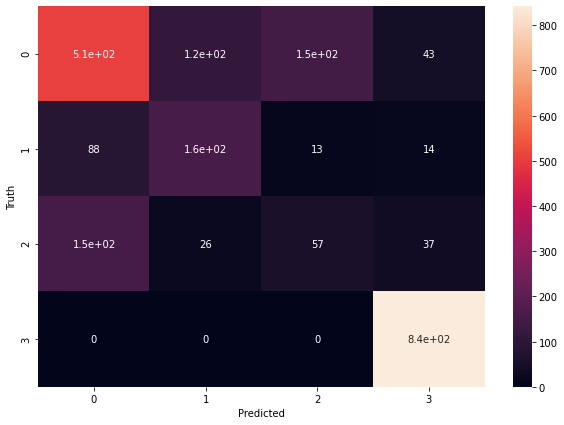

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.62      0.65       814
         1.0       0.53      0.58      0.56       275
         2.0       0.26      0.21      0.23       274
         3.0       0.90      1.00      0.95       842

    accuracy                           0.71      2205
   macro avg       0.59      0.60      0.60      2205
weighted avg       0.69      0.71      0.70      2205



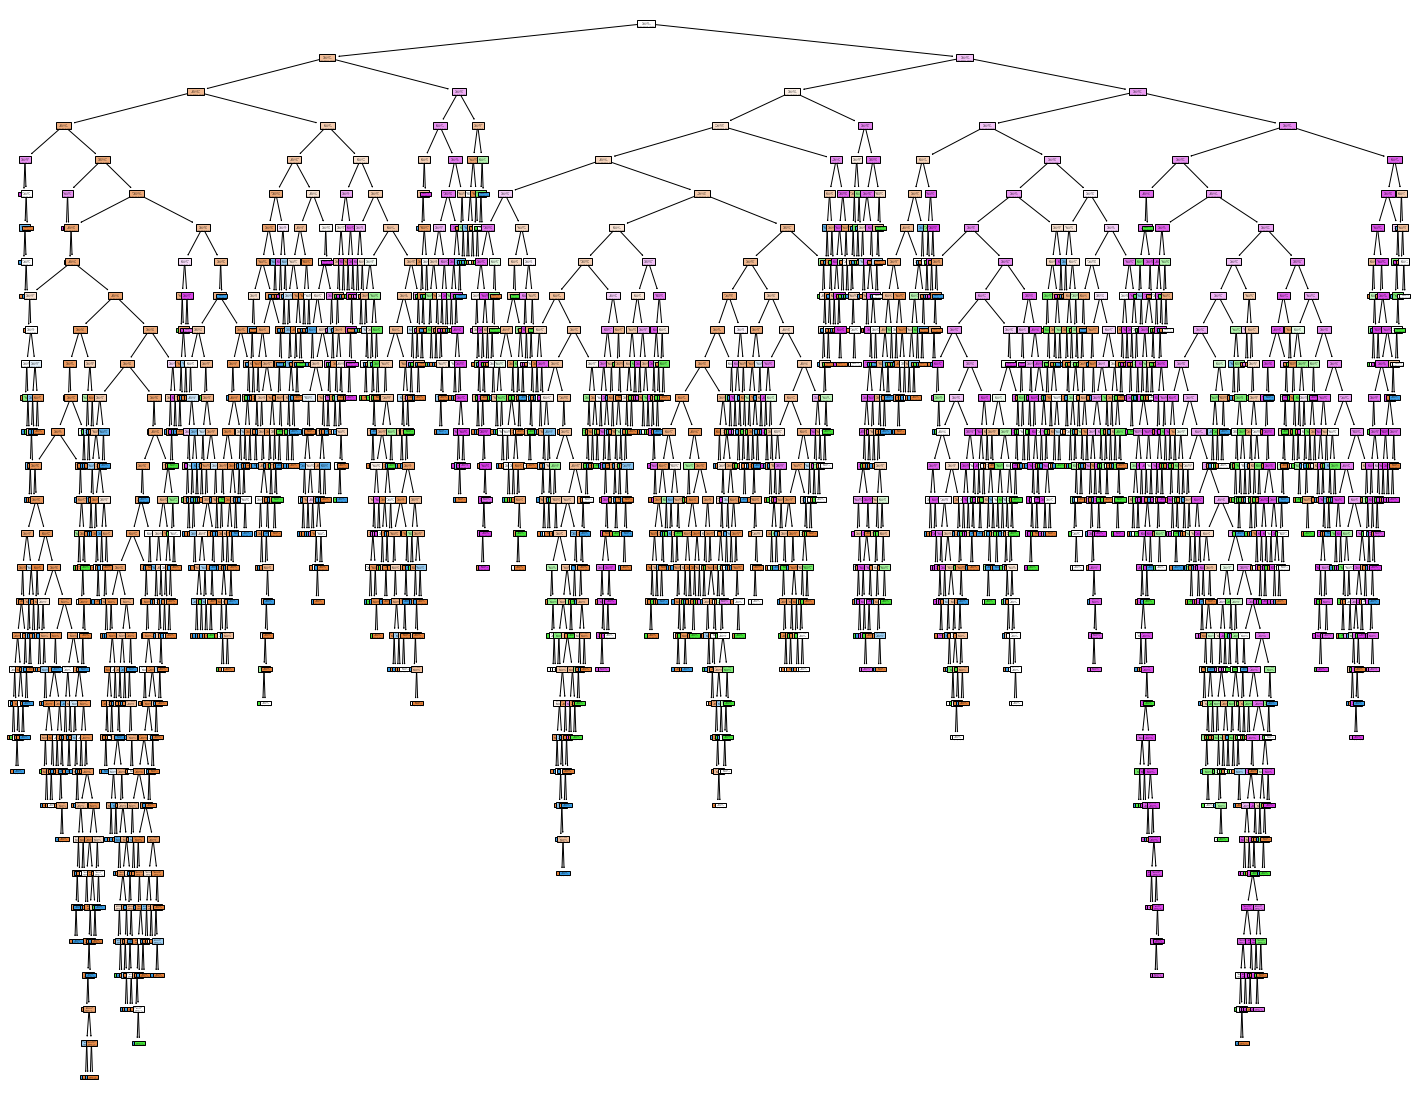

In [12]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree_model,filled=True)
